# 第7次课 时空建模基础——相关与预测
实例分析：房价数据：`./housing.csv`

### 0. Pandas/Scipy介绍

**Pandas**:
Pandas是基于numpy的一个工具包，专门用于数据分析,其中关键的数据结构包括：Series、DataFrame、Panel等。

Series:一维数组，与Numpy中的一维array类似。二者与Python基本的数据结构List也很相近。Series如今能保存不同种数据类型，字符串、boolean值、数字等都能保存在Series中。

**Scipy**:
Scipy也是基于numpy的一个工具包，主要用于科学计算，它包括统计,优化,整合,线性代数模块,傅里叶变换,信号和图像处理,常微分方程求解器，常用机器学习算法等等。


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 1. 数据读取与可视化

In [112]:
housing_data = pd.read_csv("../参考/housing.csv")
housing_data.head(5) # 显示数据前5行

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [113]:
housing_data.info() # 数据基本介绍

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [114]:
housing_data.describe() # 数据每一列的描述性统计特征

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [115]:
housing_data.ocean_proximity.value_counts() # ocean_proximity值的统计

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [116]:
plt.style.use("bmh") # 图使用特定背景仰视
plt.style.available # 有哪些背景样式可以用

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

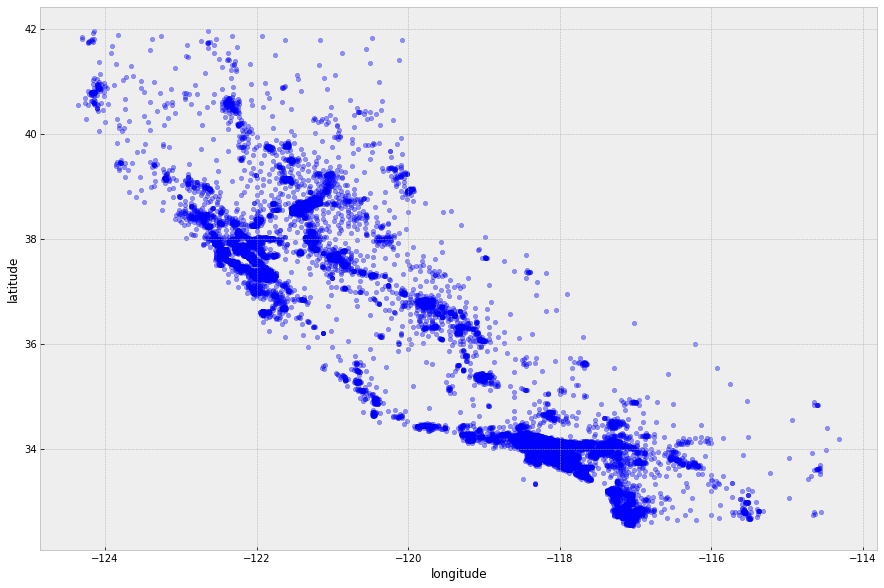

In [129]:
# 散点图
housing_data.plot(kind="scatter", x='longitude', y="latitude", alpha=0.4, figsize=(15, 10))

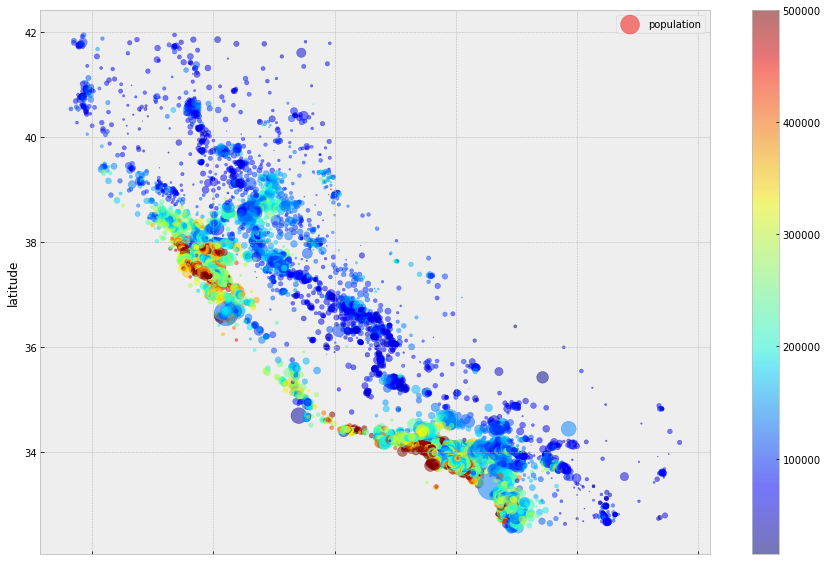

In [130]:
# 带属性的散点图
housing_data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,
            s=housing_data.population/50,label="population",
            c=housing_data.median_house_value,cmap=plt.get_cmap('jet'),colorbar=True,
            figsize=(15, 10)) # 经纬度为散点图，点的大小(s)代表人口数，点的颜色(c)代表房屋价值。
plt.legend()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

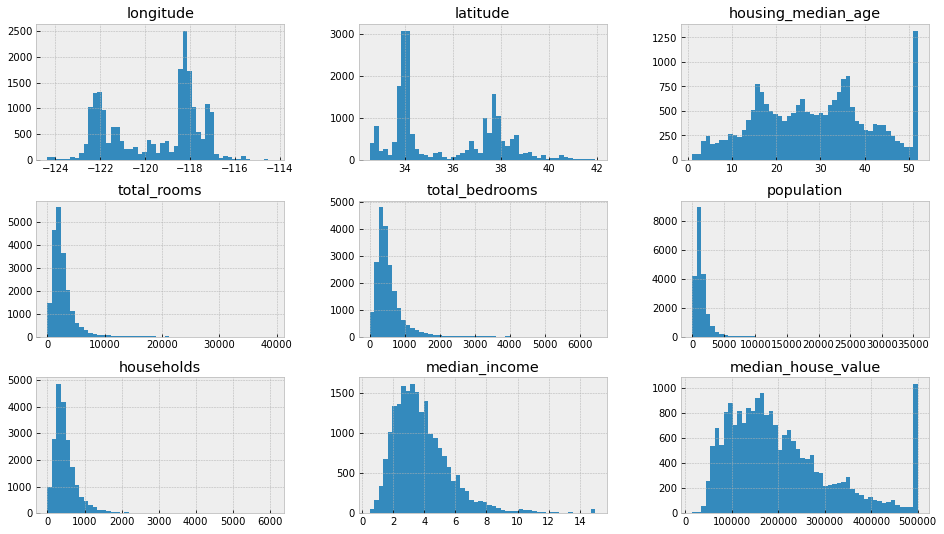

In [117]:
housing_data.hist(bins=50, figsize=(16, 9)) # dataframe.hist: 所有数值列的直方图

初步判断：如果按照直方图相似程度，median_house_value可能和total_rooms/total_bedrooms/population/households/median_income等相关联。

## 2. 相关性系数计算
**pandas**：直接使用Pandas中的Series.corr()方法计算相关系数，只需在参数method中指定是Pearson（默认）、Spearman或Kendall就可以了。不过返回的只有相关系数，没有p-值。

**Scipy.stats**：在Scipy.stats中，三个相关性检验分别需要调用三种不同的方法，分别是pearsonr()、spearmanr()、kendalltau()。

In [118]:
# 以这两个数据为例：
X1 = housing_data.median_house_value
X2 = housing_data.total_rooms

### 2.1皮尔森相关系数

In [119]:
corrp = X1.corr(X2, method='pearson')
print("Pearson相关系数：", corrp)

sci_pearson = stats.pearsonr(X1, X2)
print(sci_pearson)

Pearson相关系数： 0.13415311380656308
(0.1341531138065629, 1.68938456347236e-83)


In [120]:
# 用公式计算
r = X1.cov(X2) / (X1.std() * X2.std())
print(f"手算Pearson：{r}")

手算Pearson：0.1341531138065644


In [121]:
# 浮点数舍入误差：计算顺序不一样，结果会有细微差异
print(np.sqrt(2))
print(np.sqrt(2) ** 2)

1.4142135623730951
2.0000000000000004


### 2.2斯皮尔曼相关系数
一个数的等级，就是将它所在的一列数据按照从小到大排序后，这个数所在的位置。如果有的数值相同，则将它们所在的位置取算数平均。

In [122]:
r = X1.corr(X2, method='spearman')
print("Spearman：", r)

sci_spearman = stats.spearmanr(X1, X2)
print(sci_spearman)

Spearman： 0.20595200847635764
SpearmanrResult(correlation=0.20595200847635764, pvalue=1.5614222609650307e-196)


In [123]:
# 用公式算
x1, x2 = X1.dropna(), X2.dropna() # 删除Nan
n = x1.count() # 有几对数据

x1 = pd.Series(stats.rankdata(X1)) # 转为等级数据
x2 = pd.Series(stats.rankdata(X2))

d = (x1 - x2) ** 2
d_sum = d.sum() # 平方和

p = 1 - 6 * d_sum / (n * (n ** 2 - 1)) # 计算Spearman相关系数
print(f"手算Spearman系数结果：{p}")

手算Spearman系数结果：0.2059930973404368


### 2.3肯德尔秩相关系数

In [124]:
k = X1.corr(X2, method='kendall')
print("kendalltau：", k)

sci_kendalltau = stats.kendalltau(X1, X2)
print(sci_kendalltau)

kendalltau： 0.1378628845801698
KendalltauResult(correlation=0.1378628845801698, pvalue=2.1994557756608847e-193)


In [97]:
# 用公式算
import time

x1 = pd.Series(stats.rankdata(X1)) # 转为等级数据
x2 = pd.Series(stats.rankdata(X2))
n = x1.count()

concordant_pair = 0
disconcordant_pair = 0

# 方法一：直接循环，效率较低
s1 = time.time()
for xx1, xx2 in zip(x1, x2): 
    for xxx1, xxx2 in zip(x1, x2):
        if (xx1 - xxx1) * (xx2 - xxx2) > 0:
            concordant_pair += 1
        elif (xx1 - xxx1) * (xx2 - xxx2) < 0:
            disconcordant_pair += 1
print(time.time() - s1)

tau = (concordant_pair - disconcordant_pair) / (n * (n - 1) / 2)
print(tau)

205.94305157661438
241687520 183046052
0.27531919137059324


In [99]:
# 方法二：用ndarray

import time

x1 = stats.rankdata(X1) # 转为等级数据
x2 = stats.rankdata(X2)

s2 = time.time()
d = (x1[:, None] - x1[None]) * (x2[:, None] - x2[None]) # 构造数组：对x1和x2中元素自己两两做差
concordant = (d > 0).astype(np.int).sum()
disconcordant = (d < 0).astype(np.int).sum()
print(time.time() - s2)
print(concordant, disconcordant)



C:\Users\user\AppData\Local\Temp/ipykernel_19624/343632851.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  concordant = (d > 0).astype(np.int).sum()
C:\Users\user\AppData\Local\Temp/ipykernel_19624/343632851.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

28.31487250328064
241687520 183046052


In [101]:
tau = (concordant - disconcordant) / (n * (n - 1) / 2)
print("手算结果：", tau)

手算结果： 0.27531919137059324


<AxesSubplot:>

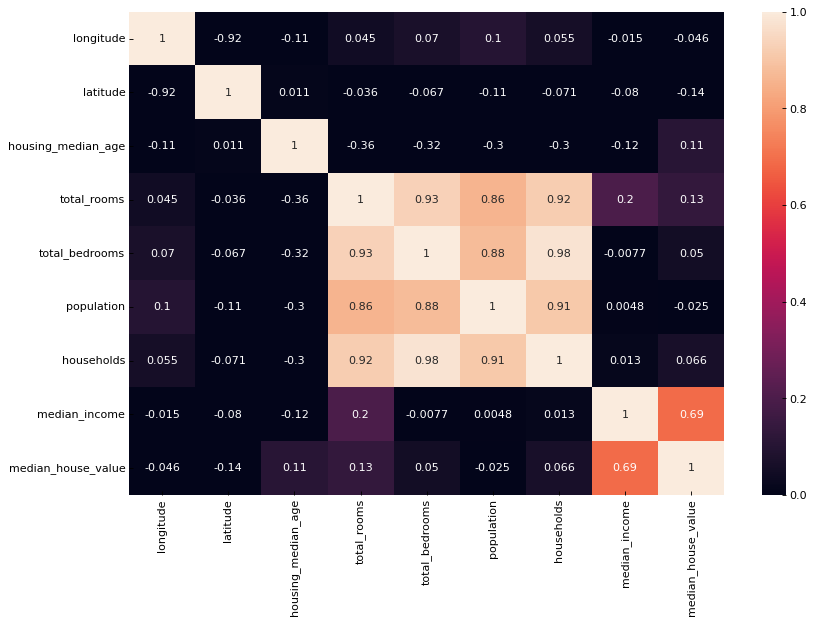

In [131]:
# 热力图
import seaborn as sns
fig = plt.figure(figsize=(12,8),dpi=80)
sns.heatmap(housing_data.corr(),annot =True,vmin = 0, vmax =1) # 用热力图的方式表示各因素两两之间的相关性

## 3. 偏相关系数计算
计算在控制了median_income之后，X1和X2之间的偏相关系数

In [ ]:
X3 = housing_data.median_income

In [127]:
def partial_ab_c(x1, x2, x3):
    """
    params: x1, x2, x3 分别为参与偏相关分析的变量
    return: 偏相关系数值
    """
    df = pd.DataFrame([x1,x2,x3],index=['a','b','c']).T # 创建数据集
    print('数据:\n',df)
    print('相关系数矩阵为：\n',df.corr()) # 相关系数矩阵
    r_ab = df.a.corr(df.b) # a和b的简单相关
    r_ac = df.a.corr(df.c) # a和c的简单相关
    r_bc = df.b.corr(df.c) # b和c的简单相关
    r_ab_c = (r_ab - r_ac * r_bc)/(((1 - r_ac ** 2) ** 0.5) * ((1 - r_bc ** 2) ** 0.5)) # 计算偏相关系数
    print('ab_c的一阶偏相关系数为：', r_ab_c)
    return r_ab_c

In [128]:
partial_ab_c(X1, X2, X3)

数据:
               a       b       c
0      452600.0   880.0  8.3252
1      358500.0  7099.0  8.3014
2      352100.0  1467.0  7.2574
3      341300.0  1274.0  5.6431
4      342200.0  1627.0  3.8462
...         ...     ...     ...
20635   78100.0  1665.0  1.5603
20636   77100.0   697.0  2.5568
20637   92300.0  2254.0  1.7000
20638   84700.0  1860.0  1.8672
20639   89400.0  2785.0  2.3886

[20640 rows x 3 columns]
相关系数矩阵为：
           a         b         c
a  1.000000  0.134153  0.688075
b  0.134153  1.000000  0.198050
c  0.688075  0.198050  1.000000
ab_c的一阶偏相关系数为： -0.002980512491783179


-0.002980512491783179

## 4. 假设前提是否满足？
1) 是否符合线性关系

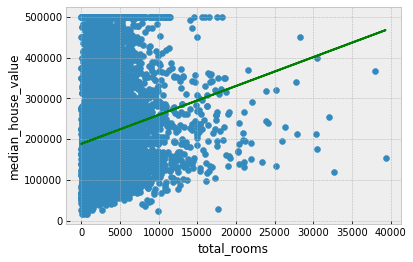

In [125]:
import numpy as np
import matplotlib.pyplot as plt
x = X2
y = X1
plt.scatter(x,y)
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
parameters = np.polyfit(x, y, 1) # 拟合一次曲线 系数
y1 = parameters[0] * x + parameters[1] # 拟合的因变量值
plt.plot(x,y1,color='g')
plt.show()

结论：数据基本不存在线性关系

2) 检验数据是否为正态分布

`scipy.stats`中有多种方法可以用来检验正态分布，比如`normaltest()`、`shapiro()`、`kstest(rvs='norm')`等。这里我们选用`shapiro()`（官方文档[在此](https://scipy.github.io/devdocs/generated/scipy.stats.shapiro.html?highlight=shapiro%22%20%5Cl%20%22scipy.stats.shapiro)），检验两个变量是否符合正态分布。原假设是样本来自一个正态分布的总体。

median_house_value正态分布检验： ShapiroResult(statistic=0.9122979640960693, pvalue=0.0)
total_rooms正态分布检验： ShapiroResult(statistic=0.6952453851699829, pvalue=0.0)


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5, 1.0, 'total_rooms histogram')

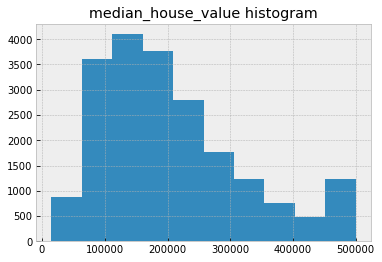

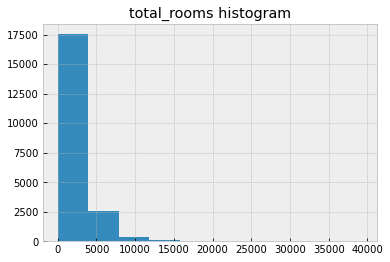

In [126]:
from scipy import stats
import matplotlib.pyplot as plt

# 正态分布统计检验
print('median_house_value正态分布检验：',stats.shapiro(X1))
print('total_rooms正态分布检验：',stats.shapiro(X2))
# 直方图
plt.figure()
plt.hist(X1)
plt.title('median_house_value histogram')
plt.figure()
plt.hist(X2)
plt.title('total_rooms histogram')

由输出的数值结果，可以发现检验统计量为0.9123和0.6952，对应的p值均为0.0。由于P值小于0.05，我们拒绝原假设，即有足够的证据证明样本数据并非来自正态分布。因此，应该选用Spearman相关系数或肯德尔相关系数来进行检验。

## 5. 数据预处理
### 5.1处理缺失值

In [132]:
#因为很多机器学习算法对缺省值比较敏感（例如LR和SVM，决策树和朴素贝叶斯相对好一点）
#缺失值赋值fillna()。
housing = housing_data.copy() # 备份原数据
housing.isnull().sum() #查看哪一列的数据存在缺失值。isnull()：null的位置为true，非null为false。sum()统计true的个数。

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [133]:
# 填补缺失值：用中位数填补该列的缺失值
median = housing.total_bedrooms.median() # “房间数”列取中位数
housing.total_bedrooms = housing.total_bedrooms.fillna(median) # 用中位数填补缺失值。fillna:填补缺失值。
housing.isnull().sum() # 检验缺失值是否已填补完毕
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 5.2特征缩放

In [134]:
# 将原有数据进行标准化缩放
numeric_cols=housing.columns[housing.dtypes!="object"] # 提取出类型为数值(int/float/double)的变量（本案例中，非数值变量类型为object）
print(numeric_cols)
numeric_col_means = housing.loc[:, numeric_cols].mean() # 均值。dataframe.loc:dataframe切片。
#print(numeric_col_means)
numeric_col_std = housing.loc[:, numeric_cols].std() # 方差
#print(numeric_col_std)
housing.loc[:, numeric_cols] = (housing.loc[:, numeric_cols] - numeric_col_means) /numeric_col_std # Z分数标准化
housing.head()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327803,1.052523,0.982119,-0.804800,-0.972453,-0.974405,-0.977009,2.344709,2.129580,NEAR BAY
1,-1.322812,1.043159,-0.607004,2.045841,1.357111,0.861418,1.669921,2.332181,1.314124,NEAR BAY
2,-1.332794,1.038478,1.856137,-0.535733,-0.827004,-0.820757,-0.843616,1.782656,1.258663,NEAR BAY
3,-1.337785,1.038478,1.856137,-0.624199,-0.719706,-0.766010,-0.733764,0.932945,1.165072,NEAR BAY
4,-1.337785,1.038478,1.856137,-0.462393,-0.612408,-0.759828,-0.629142,-0.012881,1.172871,NEAR BAY


### 5.3处理类别数据

In [135]:
# 不是所有变量都是数值型，类别型变量如何处理
housing=pd.get_dummies(housing)
housing.head()
'''
pandas的 get_dummies函数，可以直接将类别数据做成 One-Hot。
One-Hot格式：深度学习类别标签常用格式。所有类别每类各为一列，对于每个样本，属于哪个类别，该列为1，其他列为0.
可以看出类别属性ocean_proximity被我们分成了5个column，每一个代表一个category。是就是1，不是就是0。
'''

'\npandas的 get_dummies函数，可以直接将类别数据做成 One-Hot。\nOne-Hot格式：深度学习类别标签常用格式。所有类别每类各为一列，对于每个样本，属于哪个类别，该列为1，其他列为0.\n可以看出类别属性ocean_proximity被我们分成了5个column，每一个代表一个category。是就是1，不是就是0。\n'

### 5.4划分数据集

In [136]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(housing.values.shape)
print(train_set.shape)
print(test_set.shape)
'''
训练集：用于拟合模型参数。
测试集：用于测试模型能力。用于测试 使用训练集拟合的模型是否能在未参与训练的数据上 取得较好的效果。训练精度高但测试精度低的模型过拟合。
train_test_split函数：用于将矩阵随机划分为训练集和测试集，并自动返回划分好的样本。
test_size：如果是浮点数，在0-1之间，表示测试样本占比；如果是整数的话就是样本的数量。
random_state：是随机数的种子。保证每次都是同一个随机数。若为0或不填，则每次得到训练集和测试集划分都不一样
'''

(20640, 14)
(16512, 14)
(4128, 14)


'\n训练集：用于拟合模型参数。\n测试集：用于测试模型能力。用于测试 使用训练集拟合的模型是否能在未参与训练的数据上 取得较好的效果。训练精度高但测试精度低的模型过拟合。\ntrain_test_split函数：用于将矩阵随机划分为训练集和测试集，并自动返回划分好的样本。\ntest_size：如果是浮点数，在0-1之间，表示测试样本占比；如果是整数的话就是样本的数量。\nrandom_state：是随机数的种子。保证每次都是同一个随机数。若为0或不填，则每次得到训练集和测试集划分都不一样\n'

In [137]:
# 训练集自变量 因变量
print('train_set heading:')
print(train_set.head())
housing_train=train_set.drop("median_house_value",axis=1) # 去掉因变量y(房价)，仅保留自变量
# drop:删除dataframe的某一行或某一列，不改变原数据，返回一个新的dataframe保存删除后的数据。默认删除行，删除列需要加axis=1
print('housing_train heading:')
print(housing_train.head())
housing_labels_train=train_set.median_house_value.copy() # 单独拎出因变量
print('train label:')
print(housing_labels_train)

train_set heading:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196   1.267614 -1.367943            0.346470     0.224713        0.214981   
8267    0.703610 -0.871677            1.617768     0.342057        0.596485   
17445  -0.454345 -0.455001           -1.957759    -0.338631       -0.490803   
14265   1.227684 -1.377307            0.584838    -0.556818       -0.404965   
2271   -0.114945  0.537530            1.141031    -0.116319       -0.252363   

       population  households  median_income  median_house_value  \
14196    0.772232    0.322916      -0.321646           -0.899998   
8267    -0.098438    0.670783      -0.030619            1.518638   
17445   -0.450767   -0.427745       0.150345           -0.296855   
14265   -0.006602   -0.378050      -1.014922           -0.983190   
2271    -0.486971   -0.312661      -0.166579           -0.956326   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
14196                          0     

In [138]:
# 测试集自变量 因变量
housing_test=test_set.drop("median_house_value",axis=1) # 去掉因变量y(房价)，仅保留自变量
# drop:删除dataframe的某一行或某一列，不改变原数据，返回一个新的dataframe保存删除后的数据。默认删除行，删除列需要加axis=1
housing_labels_test=test_set.median_house_value.copy() # 单独拎出因变量

# 完整数据自变量 因变量
housing_all=housing.drop("median_house_value",axis=1) # 去掉因变量y(房价)，仅保留自变量
# drop:删除dataframe的某一行或某一列，不改变原数据，返回一个新的dataframe保存删除后的数据。默认删除行，删除列需要加axis=1
housing_labels_all=housing.median_house_value.copy() # 单独拎出因变量

## 3 模型选择和训练

In [139]:
from sklearn import linear_model
from scipy.stats import pearsonr

model_LinearRegression = linear_model.LinearRegression() # 模型结构（后面介绍各种模型的使用方法）

X_train=housing_train.values # 训练集自变量
Y_train=housing_labels_train.values # 训练集因变量
X_test=housing_test.values #测试集自变量
Y_test=housing_labels_test.values# 测试集因变量
X_all=housing_all.values# 全部数据自变量
Y_all=housing_labels_all.values # 全部数据因变量
# print(X_train)
# print(Y_train)
model_LinearRegression.fit(X_train,Y_train) # 训练模型
print("Training set score:{}".format(model_LinearRegression.score(X_train, Y_train)))
print("Testing set score:{}".format(model_LinearRegression.score(X_test, Y_test)))
predict = model_LinearRegression.predict(X_train)
print("pearson score:", pearsonr(predict, Y_train))

Training set score:0.6496648627123223
Testing set score:0.6254240620553606
pearson score: (0.8060179047095173, 0.0)


In [140]:
# 交叉验证:验证我们的模型效果是否优秀，可以减少过拟合。
from sklearn.model_selection import cross_val_score 

lin_reg_scores=cross_val_score(model_LinearRegression,X_all,Y_all,scoring="neg_mean_squared_error",cv=10) 
# 训练好的模型，训练用自变量，训练用因变量。cv:交叉验证折数或可迭代的次数
lin_reg_rmse_scores=np.sqrt(-lin_reg_scores)
#print(lin_reg_rmse_scores)
print(lin_reg_rmse_scores.mean()) # 评分是每一次交叉验证的结果，取均值。

0.6258494167407882


In [141]:
###########3.具体方法选择##########
####3.1决策树回归####
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
####3.2线性回归####
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
####3.3SVM回归####
from sklearn import svm
model_SVR = svm.SVR()
####3.4KNN回归####
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
####3.5随机森林回归####
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
####3.6Adaboost回归####
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树
####3.7GBRT回归####
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
####3.8Bagging回归####
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
####3.9ExtraTree极端随机树回归####
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()


### 教程：
1. Pandas： https://ericfu.me/10-minutes-to-pandas/ , https://www.pypandas.cn/docs/

2. Matplotlib: https://www.matplotlib.org.cn/tutorials/introductory/pyplot.html
3. sklearn: https://sklearn.apachecn.org/


### 练习数据说明
数据来自https://www.kaggle.com/fernandol/countries-of-the-world/kernels, 数据集中包含了各个国家的人口、面积、GDP、产业、气候等信息。